In [2]:
!sudo pip install mtcnn

     |████████████████████████████████| 2.3MB 6.1MB/s 


# Import libs

In [3]:
from os import listdir
from PIL import Image
from numpy import asarray, dot,expand_dims
from numpy.linalg import norm
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN #Multi-tast Cascaded CNN
from tensorflow.keras.models import load_model
from numpy.linalg import norm

# Extract_face 

In [15]:
def extract_face(filename, required_size=(160, 160)):
    '''This function takes an image and extracts all faces from it'''
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = asarray(image)
    # create the detector, using default or trained weights
    detector = MTCNN()
    # detect faces in the image 
    results = detector.detect_faces(pixels)
    
    # extract the bounding box of all faces in the image
    faces_bound_boxes = [result['box'] for result in results]
    face_list = []
    for i in range(len(faces_bound_boxes)):
        x1, y1, width, height = faces_bound_boxes[i]
        # bug fix
        x1, y1 = abs(x1), abs(y1)
        x2, y2 = x1 + width, y1 + height
        # extract the face
        face = pixels[y1:y2, x1:x2]
        # resize pixels to the model size
        image = Image.fromarray(face)
        image = image.resize(required_size)
        face_array = asarray(image)
        face_list.append(face_array)
    return face_list

In [ ]:
extract_face('Screenshot_2021-01-05 Time to deport Indian Muslim preacher Zakir Naik, says Malaysian activist.png')

# Testing extract_face function

In [ ]:
# specify folder to plot
folder = '/content/'
i = 1
# enumerate files
for filename in listdir(folder):
    # path
    path = folder + filename 
    pyplot.imshow(asarray(img))
    # get face
    for face in extract_face(path):
        # plot
        pyplot.subplot(2, 7, i)
        pyplot.axis('off')
        pyplot.imshow(face)
        i += 1
pyplot.show()

# Import face-net pretrained model from google drive

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
facenet = load_model('gdrive/MyDrive/Colab Notebooks/مشروع التخرج/facenet_keras.h5')

In [ ]:
print(facenet.summary())

In [24]:
def prepare_face(face_pixels):
    '''To predict an embedding, first the pixel values of the image need to be suitably prepared to meet the expectations of the FaceNet model.
       This specific implementation of the FaceNet model expects that the pixel values are standardized'''

    face_pixels = face_pixels.astype('float32')
    mean , std = face_pixels.mean() , face_pixels.std()
    face_pixels = (face_pixels - mean) / std

    #In order to make a prediction for one example in Keras, we must expand the dimensions so that the face array is one sample.
    sample = expand_dims(face_pixels, axis=0)
    return sample

In [11]:
def get_embedding(face):
    """return the embedding of a face"""
    return facenet.predict(face)[0]

In [12]:
def get_similarity(face1, face2):
    cos_sim = dot(face1, face2)/(norm(face1)*norm(face2))
    return cos_sim

In [52]:
def wrapper(image1, image2):
    """This function uses all of the previous functions to give the similarity of two input faces"""
    faces_in_image1 = extract_face(image1)
    faces_in_image2 = extract_face(image2)

    l1, l2 = [], []
    for face in faces_in_image1:
        face = prepare_face(face)
        emb = get_embedding(face)
        l1.append({'face':face , 'embedding':asarray(emb)})

    for face in faces_in_image2:
        face = prepare_face(face)
        emb = get_embedding(face)
        l2.append({'face':face , 'embedding':asarray(emb)})   
    
    print(len(l1),len(l2))

    for face1 in l1:
        face1 = face1['face'].reshape(160,160,3)
        pyplot.imshow(face1)
        pyplot.show()
    for face2 in l2:
        face2 = face2['face'].reshape(160,160,3)
        pyplot.imshow(face2)
        pyplot.show()
    print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')
    for face1 in l1:
        for face2 in l2:
            sim = get_similarity(face1['embedding'] , face2["embedding"])
            face1_1 = face1['face'].reshape(160,160,3)
            face2_2 = face2['face'].reshape(160,160,3)
            print('The first extracted face is ')
            pyplot.imshow(face1_1)
            pyplot.show()
            print('The second extracted face is ')
            pyplot.imshow(face2_2)
            pyplot.show()
            print('and the similarity between them is {}'.format(sim))
            print('##################################################################################################################')
            

In [ ]:
wrapper('Screenshot_2021-01-06 Facebook_6.jpg' , 'Screenshot_2021-01-06 Facebook_6.jpg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5 1


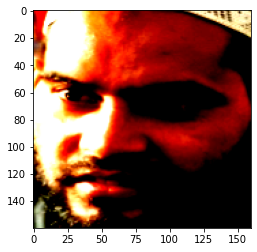

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


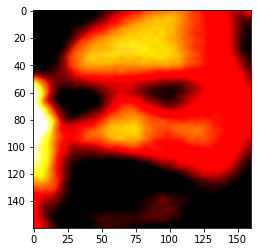

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


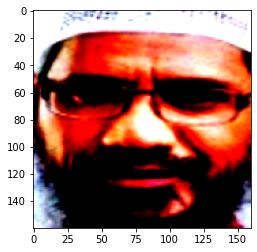

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


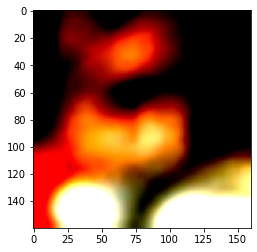

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


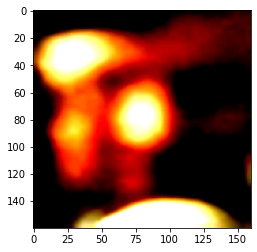

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


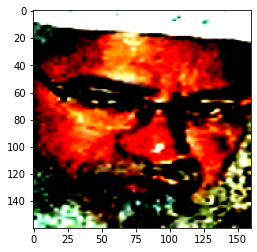

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
The first extracted face is 


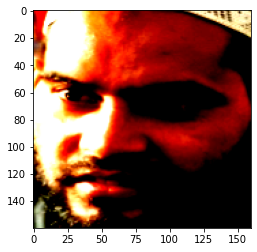

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The second extracted face is 


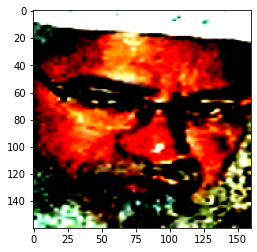

and the similarity between them is 0.27261874079704285
##################################################################################################################
The first extracted face is 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


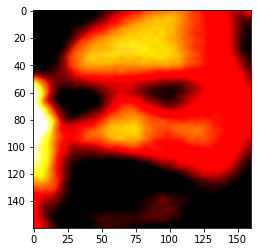

The second extracted face is 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


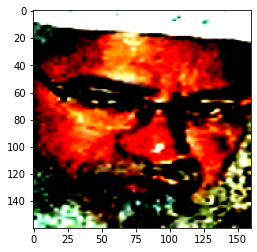

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


and the similarity between them is 0.266849547624588
##################################################################################################################
The first extracted face is 


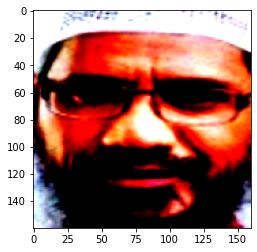

The second extracted face is 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


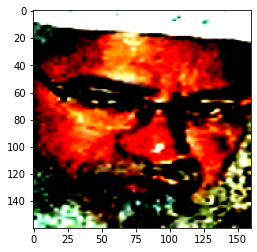

and the similarity between them is 0.6949120163917542
##################################################################################################################
The first extracted face is 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


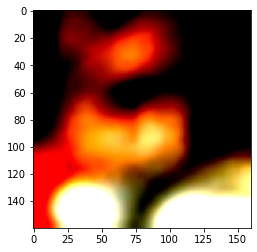

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The second extracted face is 


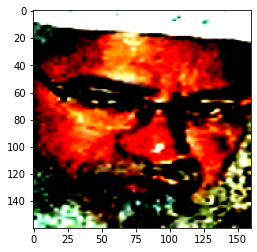

and the similarity between them is 0.3324517011642456
##################################################################################################################
The first extracted face is 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


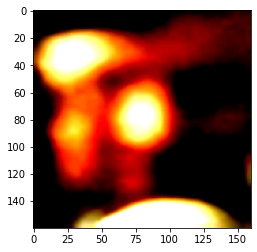

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The second extracted face is 


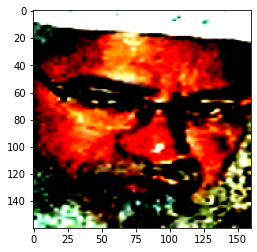

and the similarity between them is 0.3518636226654053
##################################################################################################################


In [54]:
wrapper('Screenshot_2021-01-05 Why does India want to arrest a popular Muslim scholar .png' , 'Screenshot_2021-01-05 Time to deport Indian Muslim preacher Zakir Naik, says Malaysian activist.png')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2 1


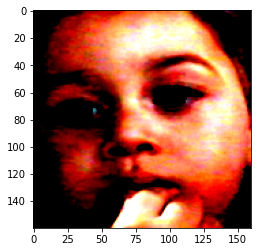

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


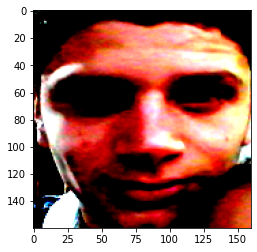

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


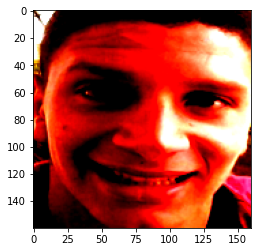

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
The first extracted face is 


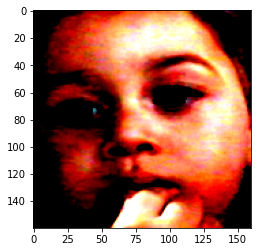

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The second extracted face is 


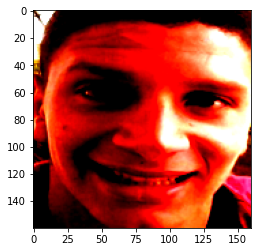

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


and the similarity between them is 0.12677958607673645
##################################################################################################################
The first extracted face is 


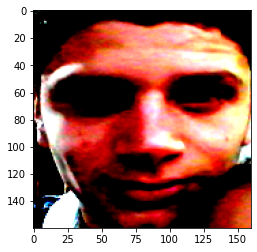

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The second extracted face is 


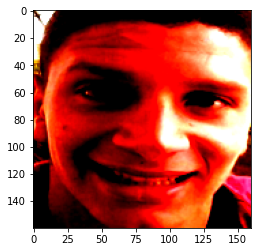

and the similarity between them is 0.8538632392883301
##################################################################################################################


In [55]:
wrapper('Screenshot_2021-01-06 Facebook_6.jpg' , 'Screenshot_2021-01-06 Facebook_2.png')